In [1]:
import numpy as np
from matplotlib import pyplot
from iminuit import Minuit
import gamma_spectra
import pyfits

%matplotlib inline  

c_light = 2.9979e8 # m/s speed of light
h_Planck = 4.1357e-15 # eV * s Planck constant
kB = 8.6173303e-5 # eV/K

gamma_spectra.py:222: RuntimeWarning: overflow encountered in exp
  expf = 1 / (np.exp(Eg/T) - 1) # T[ev] == k_B * T[K]


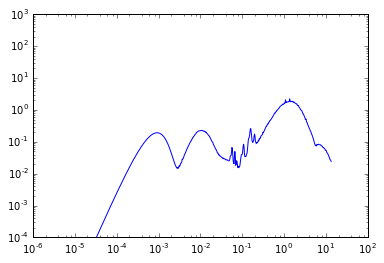

In [2]:
height = 1
IRFmap_fn = '../../data/ISRF_flux/Standard_0_0_' + str(height) + '_Flux.fits.gz' # Model for the ISRF
hdu = pyfits.open(IRFmap_fn)                                                              # Physical unit of field: 'micron'
wavelengths = hdu[1].data.field('Wavelength') * 1.e-6                                     # in m
E_irf_galaxy = c_light * h_Planck / wavelengths[::-1]                                     # Convert wavelength in eV, invert order
EdNdE_irf_galaxy = hdu[1].data.field('Total')[::-1] / E_irf_galaxy                        # in 1/cm^3. Since unit of 'Total': eV/cm^3

dlogE_irf = 0.0230258509299398                                                            # Wavelength bin size
    
T_CMB = 2.73 * kB                                                                           # CMB temperature
E_irf = np.e**np.arange(np.log(E_irf_galaxy[len(E_irf_galaxy)-1]), -6.* np.log(10.), -dlogE_irf)[:0:-1]# CMB-energies array with same log bin size as IRF_galaxy in eV
irf_CMB = gamma_spectra.thermal_spectrum(T_CMB)     # Use thermal_spectrum from gamma_spectra.py, returns IRF in eV/cm^3
EdNdE_CMB = irf_CMB(E_irf) / E_irf                                                        # in 1/cm^3

#print EdNdE_CMB
    
#E_irf = np.append(E_CMB, E_irf_galaxy)                                                    # Glue arrays together: Energies in eV
EdNdE_irf = EdNdE_CMB + np.append(np.zeros(len(E_irf)-len(E_irf_galaxy)), EdNdE_irf_galaxy)                                        # Differential flux in 1/cm^3 
    
pyplot.loglog(E_irf, E_irf * EdNdE_irf)
pyplot.ylim((1.e-4, 1.e3))
#pyplot.xlim((0., 0.4))
pyplot.show()